# Clustering

- Clustering is a type of unsupervised learning
- We need to decide how many clusters we want to get as k = 

## Data

In [136]:
data(iris)
# remark: iris dataset is already in order. 
# Otherwise, ordering data and resetting rownames should be proceeded in prior to sampling.

## Sampling with createDataPartition: Training and Testing

In [137]:
library(caret)

In [138]:
set.seed(1111)
samp <- createDataPartition(iris$Species, p=0.7, list = F)
# p = the percentage of training data
# list = F: matrix // T: list

In [139]:
training <- iris[samp, ]
testing <- iris[-samp, ]

In [140]:
summary(training)
summary(testing)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.894   Mean   :3.073   Mean   :3.785   Mean   :1.214  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.100   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.500   1st Qu.:0.200   versicolor:15  
 Median :5.700   Median :3.00   Median :4.200   Median :1.300   virginica :15  
 Mean   :5.724   Mean   :3.02   Mean   :3.696   Mean   :1.164                  
 3rd Qu.:6.300   3rd Qu.:3.40   3rd Qu.:5.000   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.00   Max.   :6.400   Max.   :2.400                  

## Features and Targets

### Features

In [141]:
training.data <- scale(training[-5])  # features
summary(training.data)

  Sepal.Length      Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.7710   Min.   :-1.9678   Min.   :-1.5596   Min.   :-1.4470  
 1st Qu.:-0.9414   1st Qu.:-0.6159   1st Qu.:-1.2235   1st Qu.:-1.1873  
 Median :-0.1117   Median :-0.1652   Median : 0.3446   Median : 0.1113  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7179   3rd Qu.: 0.5107   3rd Qu.: 0.7366   3rd Qu.: 0.7606  
 Max.   : 2.1401   Max.   : 2.9892   Max.   : 1.7446   Max.   : 1.6697  

### Targets

In [142]:
training$Species # targets

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  virginica 
 [79] virginica  virginica  virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica 
Levels: setosa versicolor virginica

## Modelling: kmeans

In [143]:
iris.kmeans <- kmeans(training.data, centers = 3, iter.max = 100000)

# kmeans: modelling
# centers: number of clusters // a set of initial cluster centers
# iter.max: the maximum number of iterations allowed

In [144]:
iris.kmeans

K-means clustering with 3 clusters of sizes 35, 40, 30

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1 -1.026049007  0.85835283   -1.2987392   -1.250393
2  0.006772601 -0.82428695    0.3739542    0.299612
3  1.188027041  0.09763763    1.0165901    1.059309

Clustering vector:
  1   2   5   6   7  10  11  13  16  17  18  19  20  21  23  24  26  29  30  31 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 33  34  35  36  38  39  41  42  43  44  45  46  47  49  50  51  52  54  55  57 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   3   3   2   2   3 
 58  59  62  63  64  65  66  67  71  72  73  76  77  78  81  82  83  84  85  87 
  2   2   2   2   2   2   3   2   2   2   2   2   2   3   2   2   2   2   2   3 
 88  89  90  91  92  93  95  96  98  99 101 102 103 105 106 107 108 110 111 112 
  2   2   2   2   2   2   2   2   2   2   3   2   3   3   3   2   3   3   3   2 
113 115 116 118 119 120 121 123 124 127 130 131 134 1

## Validation

In [145]:
head(training, 2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [146]:
training$cluster <- as.factor(iris.kmeans$cluster) 
# add cluster column to compare predictions with targets
head(training)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1
6,5.4,3.9,1.7,0.4,setosa,1
7,4.6,3.4,1.4,0.3,setosa,1
10,4.9,3.1,1.5,0.1,setosa,1


In [147]:
table(training$Species, training$cluster) 
# training$Species: setosa, versicolor, virginica
# training$cluster: 1, 2, 3

            
              1  2  3
  setosa     35  0  0
  versicolor  0 29  6
  virginica   0 11 24

    Now we can see that 
    cluster 1 is virginica, cluster 2 is setosa, and cluster 3 is virginica

    Since we already know the distribution, we can also draw plots

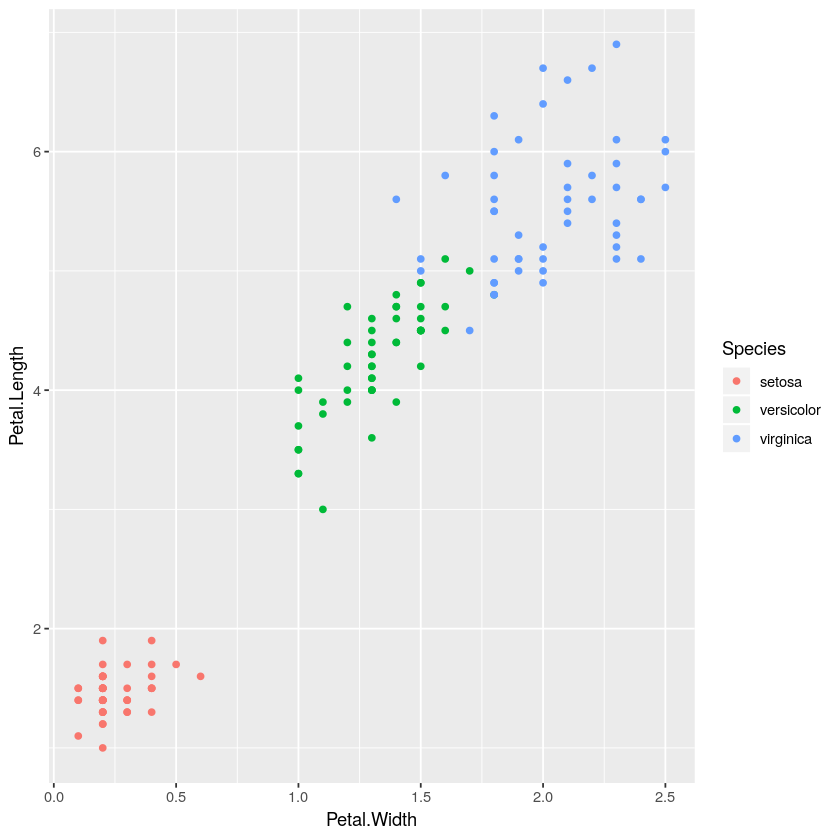

In [148]:
qplot(Petal.Width, Petal.Length, data = iris, col = Species)

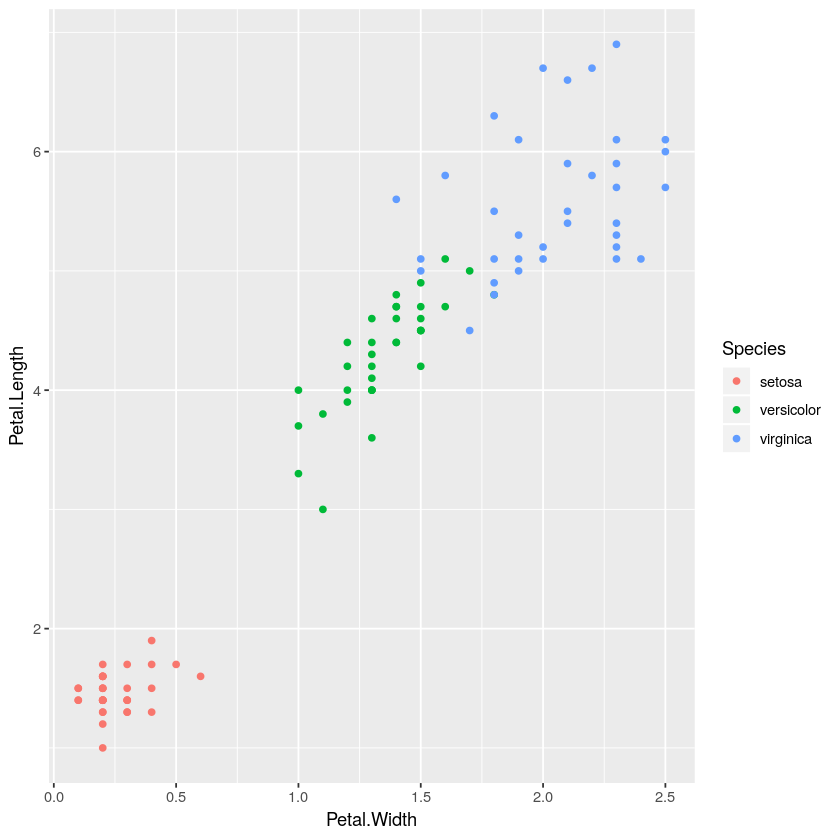

In [149]:
qplot(Petal.Width, Petal.Length, data = training, col = Species)

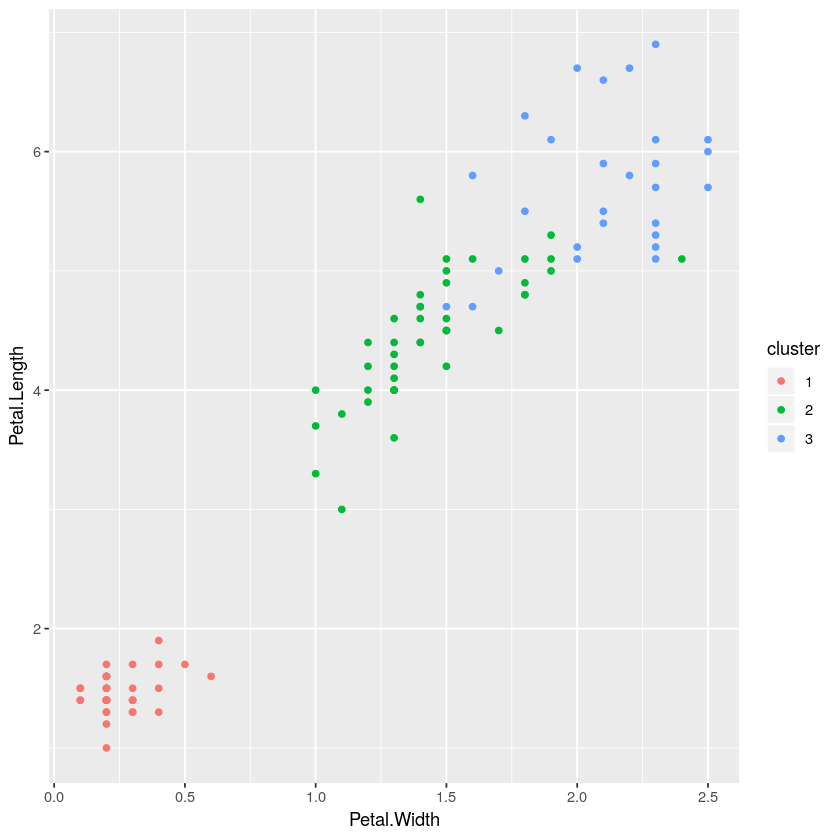

In [150]:
qplot(Petal.Width, Petal.Length, data = training, col = cluster)

## Calculate Accuracy

### Rename clustering numbers into group names

In [151]:
convert <- function(i) {
    if (i == 1) {
        return("setosa")
    } else if (i == 2) {
        return("versicolor")
    } else if (i == 3) {
        return("virginica")
    }
}

In [152]:
result <- sapply(training$cluster, convert)         # convert numbers into Species
# sapply returns matrix or vector, instead of list
# sapply(location, function)

result # predictions

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
  [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [26] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [31] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [36] "virginica"  "virginica"  "versicolor" "versicolor" "virginica" 
 [41] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [46] "versicolor" "virginica"  "versicolor" "versicolor" "versicolor"
 [51] "versicolor" "versicolor" "versicolor" "virginica"  "versicolor"
 [56] "versicolor" "versicolor" "versicolor" "versicolor" "virginica" 
 [61] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [66] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [71] "virginica"  "versicolor" "virginica"  "virginica"  "virginica" 
 [76] "versicolor" "virginica"  "virginica"  "virginica"  "versicolor"
 [81] "virginica"  "versicolor" "virginica"  "virginica"  "virginica" 
 [86] "versicolor" "virginica"  "virginica"  "versicolor" "versicolor"
 [91] "virginica"  "virginica"  "versicolor" "versicolor" "virginica" 
 [96] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[101] "virginica"  "versicolor" "virginica"  "virginica"  "versicolor"

### Compare predictions with targets

In [153]:
training$Species # targets

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  virginica 
 [79] virginica  virginica  virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [154]:
mean(training$Species == result) * 100

[1] 83.80952

## Implementing the model to Testing dataset with obtained k value

In [155]:
### Features

testing.data <- scale(testing[-5])  # features
summary(testing.data)

### Targets

testing$Species  # targets

  Sepal.Length       Sepal.Width        Petal.Length      Petal.Width     
 Min.   :-1.81094   Min.   :-2.43322   Min.   :-1.4958   Min.   :-1.4172  
 1st Qu.:-0.79387   1st Qu.:-0.52481   1st Qu.:-1.2653   1st Qu.:-1.2840  
 Median :-0.03108   Median :-0.04771   Median : 0.2907   Median : 0.1805  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.73172   3rd Qu.: 0.90649   3rd Qu.: 0.7518   3rd Qu.: 0.8462  
 Max.   : 2.76584   Max.   : 2.33780   Max.   : 1.5586   Max.   : 1.6450  

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [156]:
# model
iris.kmeansTesting <- kmeans(testing.data, centers = 3, iter.max = 100000)

In [157]:
iris.kmeansTesting

K-means clustering with 3 clusters of sizes 14, 16, 15

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    1.0858752   0.1738011    1.0193286   1.0268443
2   -0.0310769  -0.9273652    0.3195293   0.2636849
3   -0.9803348   0.8269752   -1.2922046  -1.2396519

Clustering vector:
  3   4   8   9  12  14  15  22  25  27  28  32  37  40  48  53  56  60  61  68 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   1   2   2   2   2 
 69  70  74  75  79  80  86  94  97 100 104 109 114 117 122 125 126 128 129 132 
  2   2   2   2   2   2   1   2   2   2   1   1   2   1   2   1   1   1   1   1 
133 137 139 141 143 
  1   1   1   1   2 

Within cluster sum of squares by cluster:
[1] 15.92866 14.38535 10.15346
 (between_SS / total_SS =  77.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [158]:
# Validation
testing$cluster <- as.factor(iris.kmeansTesting$cluster)
head(testing)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
3,4.7,3.2,1.3,0.2,setosa,3
4,4.6,3.1,1.5,0.2,setosa,3
8,5.0,3.4,1.5,0.2,setosa,3
9,4.4,2.9,1.4,0.2,setosa,3
12,4.8,3.4,1.6,0.2,setosa,3
14,4.3,3.0,1.1,0.1,setosa,3


In [159]:
table(testing$Species, testing$cluster) 
# testing$Species: setosa, versicolor, virginica
# testing$cluster: 1, 2, 3

            
              1  2  3
  setosa      0  0 15
  versicolor  2 13  0
  virginica  12  3  0

In [164]:
convertTesting <- function(i) {
    if (i == 1) {
        return("virginica")
    } else if (i == 2) {
        return("versicolor")
    } else if (i == 3) {
        return("setosa")
    }
}

In [165]:
# Calculate the accuracy
result <- sapply(testing$cluster, convertTesting)         # convert numbers into Species
# sapply returns matrix or vector, instead of list
# sapply(location, function)

result # predictions

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "virginica"  "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[26] "versicolor" "virginica"  "versicolor" "versicolor" "versicolor"
[31] "virginica"  "virginica"  "versicolor" "virginica"  "versicolor"
[36] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[41] "virginica"  "virginica"  "virginica"  "virginica"  "versicolor"

In [168]:
mean(testing$Species == result) * 100

[1] 88.88889

### Check with plots

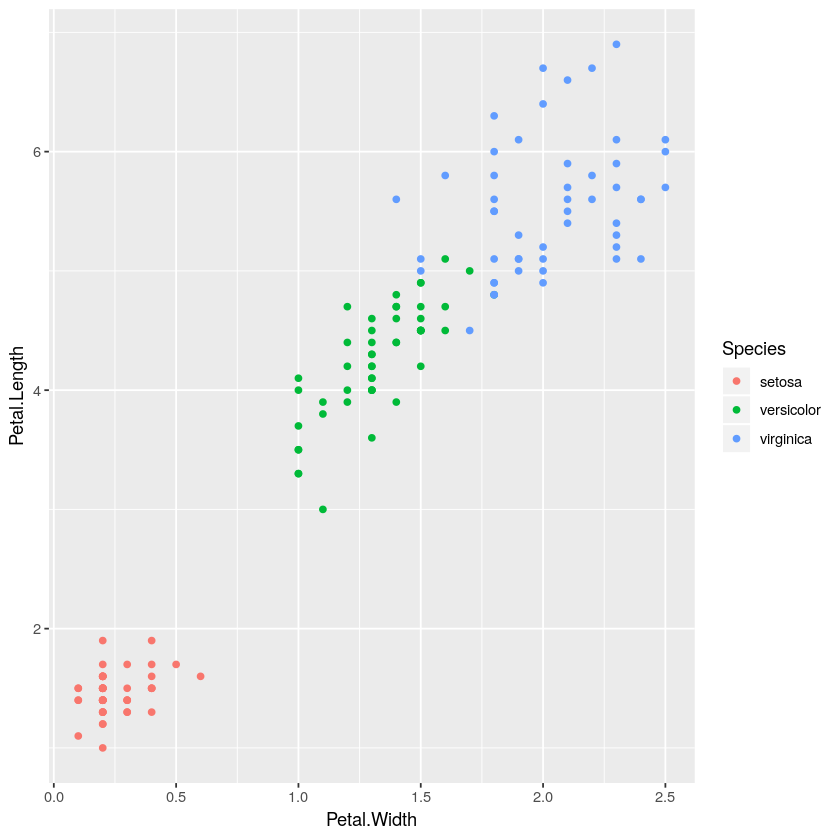

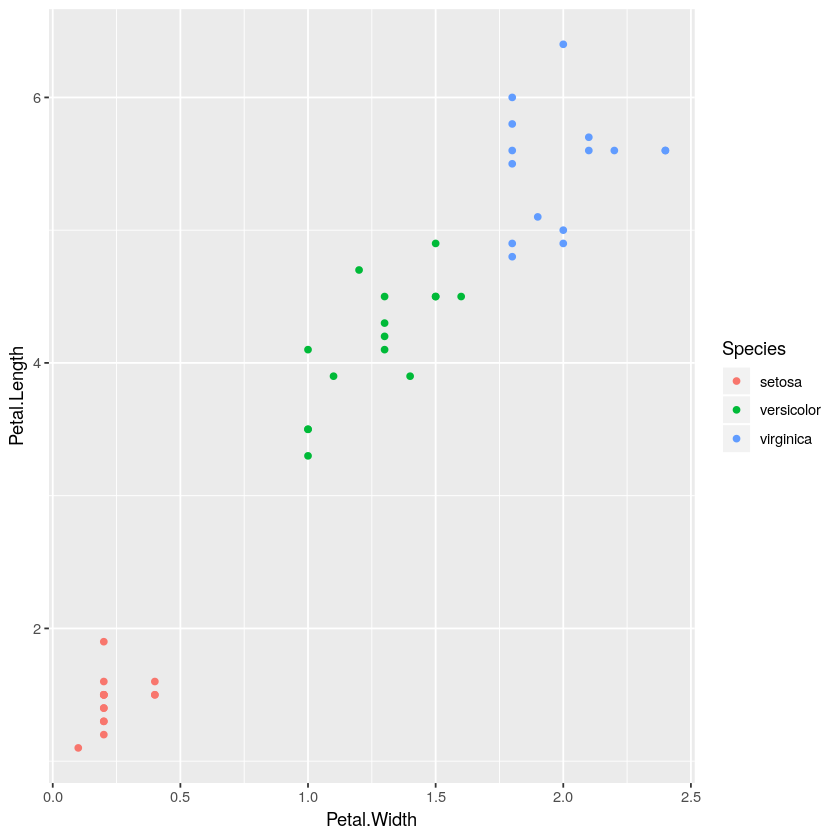

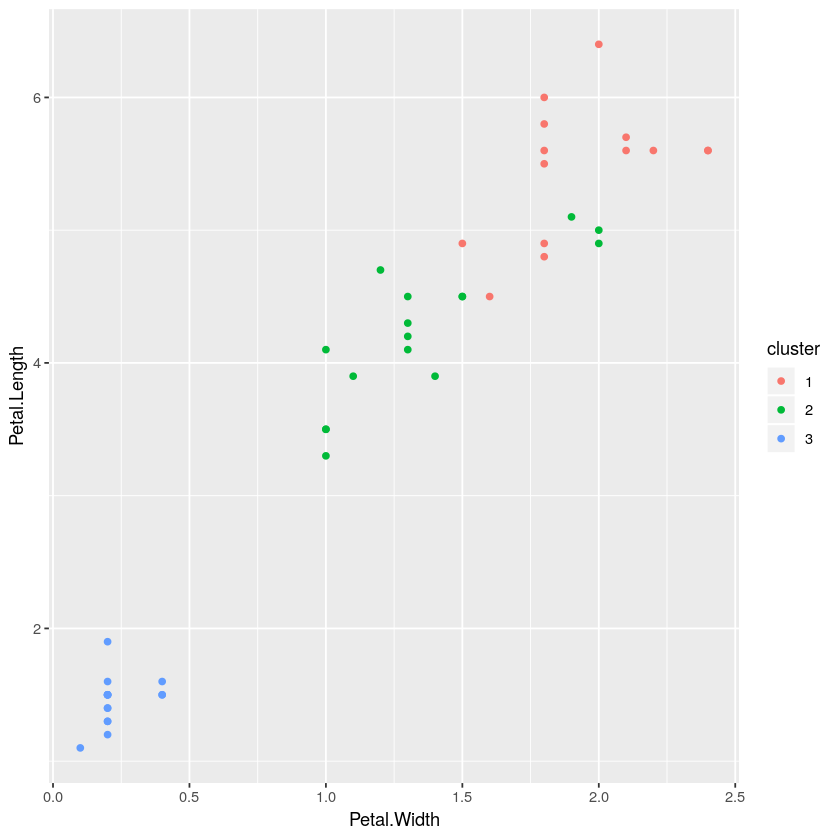

In [169]:
qplot(Petal.Width, Petal.Length, data = iris, col = Species)

qplot(Petal.Width, Petal.Length, data = testing, col = Species)

qplot(Petal.Width, Petal.Length, data = testing, col = cluster)